In [ ]:
# Run this if you can't import AlphaOpt
# Alternatively, use os.chdir('[AlphaOpt_directory]')
import os
#..\AlphaOpt\experiments\template
print(os.getcwd())
#..\AlphaOpt\experiments
%cd ".."
#..\AlphaOpt
%cd ".."

In [ ]:
import os
print(os.getcwd())
%pylab inline
import GPyOpt
import GPy
from AlphaOpt import components

In [3]:
# Sample Experiment
func  = GPyOpt.objective_examples.experiments2d.branin()
objective = GPyOpt.core.task.SingleObjective(func.f)
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])
X_init = GPyOpt.util.stats.initial_design('random', space, 5)

In [5]:
# Bayesian Optimization Components
# GP models
model = GPyOpt.models.GPModel(kernel=GPy.kern.sde_Matern52,optimize_restarts=5,verbose=False)
cost = GPyOpt.core.task.CostModel('evaluation_time')

# Decision models
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
aquisition = GPyOpt.acquisitions.EI.AcquisitionEI(model, space, aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(aquisition)

In [7]:
#Combine everything
bo = GPyOpt.methods.ModularBayesianOptimization(model=model,
                                                space=space,
                                                objective=objective,
                                                acquisition=aquisition,
                                                evaluator=evaluator,
                                                X_init=X_init,
                                                cost=cost)

In [10]:
max_iter  = 20
bo.run_optimization(max_iter = max_iter)

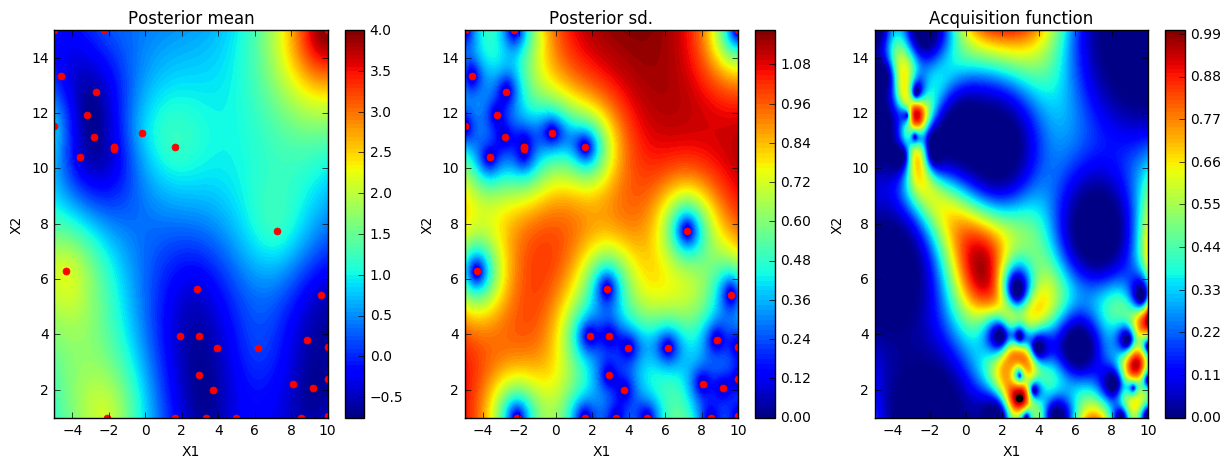

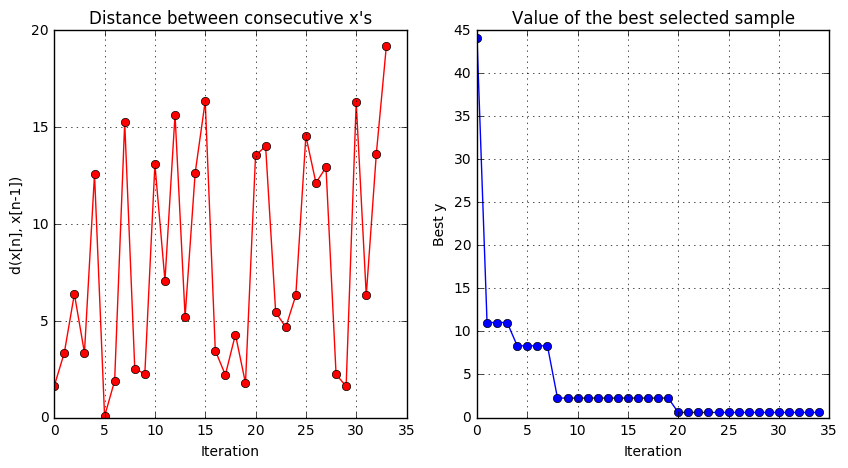

In [11]:
bo.plot_acquisition()
bo.plot_convergence()